In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

In [2]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)

In [3]:
def gaussian(x, mean, stdev):
    return np.exp(-((x - mean) ** 2) / (2 * stdev ** 2))/(np.sqrt(2*np.pi)*stdev)

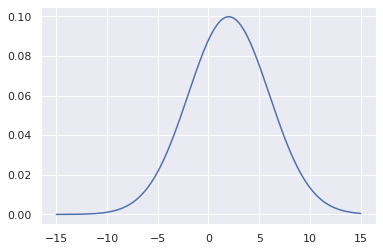

In [4]:
x = np.linspace(-15, 15, 250)
plt.plot(x, gaussian(x, 2, 4))

(0.682689492137086, 7.579375928402476e-15)


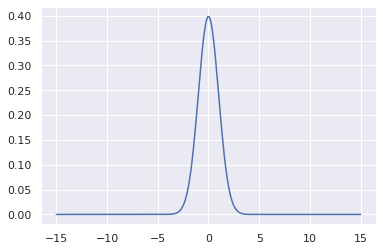

In [13]:
import scipy.integrate as integrate
print(integrate.quad(lambda x: gaussian(x, 0 ,1), -1 , 1))
plt.plot(x, gaussian(x, 0, 1))

Text(0.5, 1.0, 'Area under the curve gives probability -- here 90% probability limits')

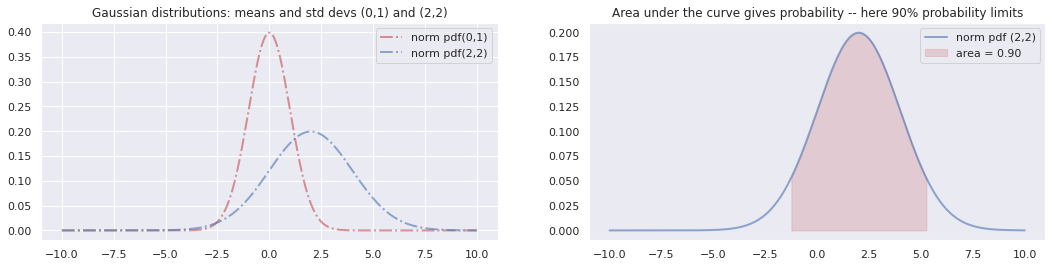

In [16]:
x = np.linspace(-10,10,250)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
ax[0].plot(x, stats.norm.pdf(x), 'r-.', lw=2, alpha=0.6, label='norm pdf(0,1)')
ax[0].plot(x, stats.norm.pdf(x,2,2), 'b-.', lw=2, alpha=0.6, label='norm pdf(2,2)')
ax[0].legend()
ax[0].set_title("Gaussian distributions: means and std devs (0,1) and (2,2)")
x_90_idx= (x > stats.norm.ppf(0.05, 2, 2)) & (x < stats.norm.ppf(0.95, 2, 2))
ax[1].grid(False)
ax[1].plot(x, stats.norm.pdf(x,2,2), 'b-', lw=2, alpha=0.6, label='norm pdf (2,2)')
ax[1].fill_between(x[x_90_idx], stats.norm.pdf(x[x_90_idx],2,2), color='r', alpha=.2, label='area = 0.90')
ax[1].legend()
ax[1].set_title("Area under the curve gives probability -- here 90% probability limits")

In [17]:
(x_lo, x_hi) = (stats.norm.ppf(0.05, 2, 2), stats.norm.ppf(0.95, 2, 2))
print("Range of x-values that account for 90% of probability of occurrence = (", x_lo, "," , x_hi, ")")
print("Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).")

Range of x-values that account for 90% of probability of occurrence = ( -1.2897072539029457 , 5.289707253902945 )
Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).


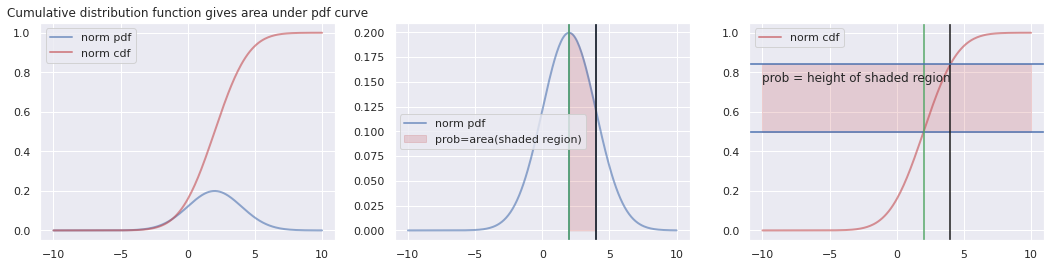

In [18]:
x = np.linspace(-10, 10, 250)
x1 = np.linspace(3, 4, 50)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
ax[0].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
ax[0].set_title("Cumulative distribution function gives area under pdf curve")
ax[0].legend()
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
x1 = np.linspace(2, 4, 50) # want to graphically 
ax[1].axvline(2)
ax[1].axvline(4)
ax[1].fill_between(x1, stats.norm.pdf(x1, 2, 2), color='r', alpha=.2, label='prob=area(shaded region)')
ax[1].legend()
ax[2].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
# put vertical and horizontal lines at x=2, pdf(x=2)
ax[1].axvline(2, color = 'g')
ax[1].axvline(4, color = 'k')
y_2 = stats.norm.cdf(2,2,2)
ax[2].axhline(y_2)
# put vertical and horizontal lines at x=4, pdf(x=4)
ax[2].axvline(2, color = 'g')
ax[2].axvline(4, color = 'k')
y_4 = stats.norm.cdf(4,2,2)
ax[2].axhline(y_4)
ax[2].text(-10,.75,"prob = height of shaded region")

ax[2].fill_between(x, y_2, y_4, color='r', alpha=0.2)
ax[2].legend()

In [19]:
delta_xs = [0.1**i for i in range(10)]
for delta_x in delta_xs:
    print(stats.norm.pdf(3.,2,2)*delta_x - (stats.norm.cdf(3.+delta_x, 2, 2) - stats.norm.cdf(3, 2, 2)))

0.026150378587619955
0.00022541440057445572
2.205896692277203e-06
2.2009582686580544e-08
2.2004626755705442e-10
2.2003796248540395e-12
2.1918663767514547e-14
2.7118054282644494e-16
8.262920572069747e-17
3.046738106457288e-17
